### Introduction

Food is more than just a necessity — it’s a culture, a conversation starter, and a source of joy for millions. In India, where food traditions run deep and regional cuisines are as diverse as the languages spoken, dining out has become an essential part of modern urban life. The rise of the food delivery and restaurant discovery ecosystem has only amplified this trend, making platforms like Zomato central to how people explore culinary experiences.

Bangalore, often referred to as the Silicon Valley of India, has emerged as a melting pot of global cultures and cuisines. With a booming IT industry and a young, cosmopolitan crowd, the city is home to thousands of restaurants offering everything from traditional South Indian meals to international gourmet dishes. This dynamic food culture provides fertile ground for both data-driven decision-making and business strategy development in the food service industry.

The restaurant business, however, is highly competitive and sensitive to factors such as location, pricing, customer reviews, and cuisine trends. While consumers rely heavily on platforms like Zomato for recommendations and reviews, restaurants depend on these platforms for visibility and growth. Understanding what drives customer preferences, ratings, and footfall is crucial for any restaurant looking to succeed in a city like Bangalore.

With the help of real-world data from Zomato, this analysis aims to uncover meaningful insights into Bangalore’s restaurant landscape. The goal is to assist aspiring restaurateurs, business analysts, and data professionals in identifying patterns and trends that can influence restaurant success — from optimal locations and pricing strategies to cuisine choices and service features.

Through thorough data cleaning, exploration, visualization, and modeling, this project will equip stakeholders with a data-backed perspective to make informed decisions in the ever-evolving food service industry.

### Problem Statement: 

`Zomato wants to enhance the user experience on its Bengaluru platform by improving the way it recommends restaurants, displays ratings, and votes. Analyzing data from over 12,000 restaurants in Bengaluru to uncover insights that can help.`

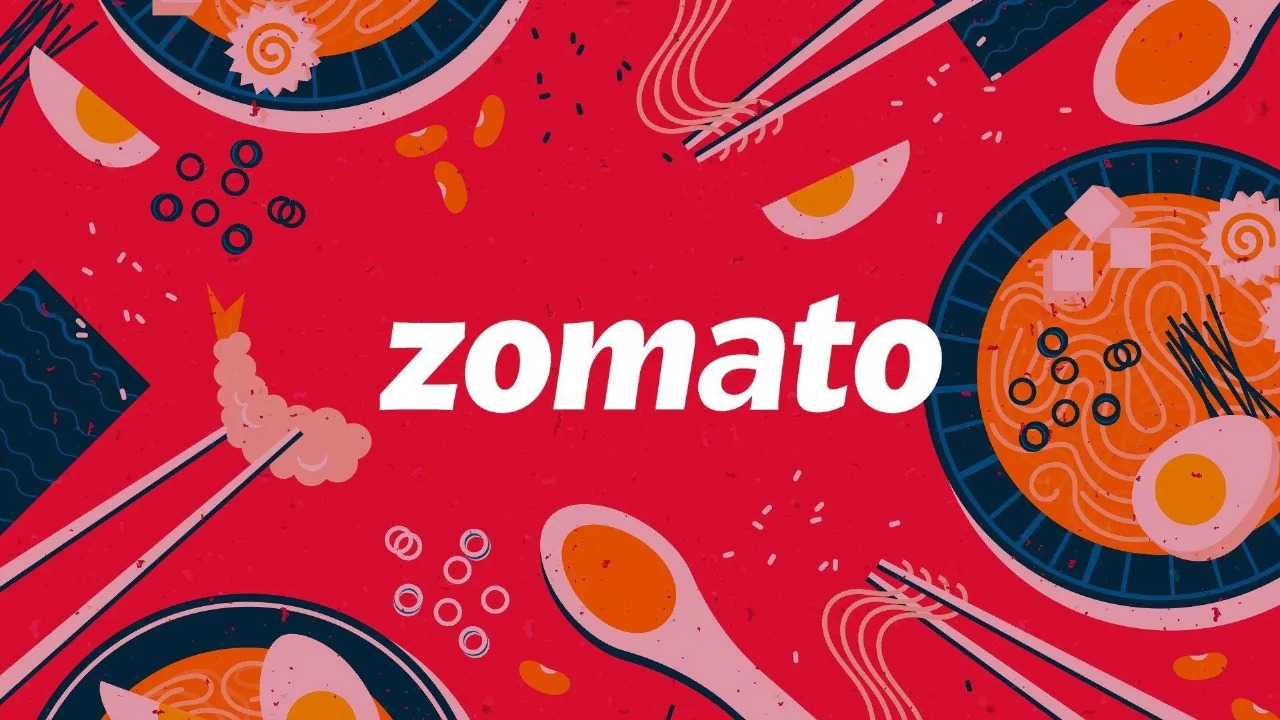

### Content

*Column Name*               | *Description*                                    |
| ----------------------------- | -------------------------------------------------- |
| url                         | URL of the restaurant listing on Zomato            |
| address                     | Address of the restaurant                          |
| name                        | Name of the restaurant                             |
| online_order                | Whether online ordering is available (Yes/No)      |
| book_table                  | Whether table booking is available (Yes/No)        |
| rate                        | Aggregate rating of the restaurant (e.g., '4.1/5') |
| votes                       | Number of votes for the restaurant                 |
| phone                       | Contact number of the restaurant                   |
| location                    | Area/location of the restaurant                    |
| rest_type                   | Type of restaurant (e.g. Casual Dining, Cafe)      |
| dish_liked                  | Most liked dishes at the restaurant                |
| cuisines                    | Types of cuisines served                           |
| approx_cost(for two people) | Approximate cost for two people                    |
| reviews_list                | List of reviews with user names and ratings        |
| menu_item                   | Menu items listed                                  |
| listed_in(type)             | Type of listing (e.g. Buffet, Delivery)            |
| listed_in(city)             | City or zone within Bangalore listed               |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/mohan/Downloads/zomato.csv/zomato.csv")
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
# Checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [5]:
# Checking for null values
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
# Dropping url, phone, dish_liked columns
data.drop(['url','phone','dish_liked'], axis = 1, inplace= True)

In [7]:
# Dropping null values from cuisines column
data = data.dropna(subset = 'cuisines')

In [8]:
# After dropping null values
data['cuisines'].isna().sum()

np.int64(0)

In [9]:
# Droping null values from location column
data = data.dropna(subset = 'location')
data['location'].isna().sum()

np.int64(0)

In [10]:
# After dropping of null values shape of the dataset
data.shape

(51672, 14)

In [11]:
# Convert approx_cost(for two people) column data_type into float
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',','', regex= True).astype('float')

In [12]:
# Let's fix null of approx_cost(for two people) by statistic median()
x = data['approx_cost(for two people)'].median()
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(x)

In [13]:
data.isna().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7741
votes                             0
location                          0
rest_type                       206
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [14]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
# A restaurant rating like NEW instead of a score (e.g., 3.9/5), it means the restaurant is recently added to the platform and 
# hasn't yet received enough reviews to generate a reliable rating.


In [16]:
# Droping NEW values from rate colummn
data = data[data['rate'] != 'NEW']

In [17]:
# After droping NEW values from rate column, The DataSet column is 
data.shape

(49464, 14)

In [18]:
# Spliting rate column by the delimiter '/'
x = data['rate'].str.split('/', n=1, expand = True)
data['New_Rating'] = x[0]
data['Rating'] = x[1]

In [19]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'Rating'],
      dtype='object')

In [20]:
# Droping Rating column
data = data.drop('Rating', axis = 1)

In [22]:
data['New_Rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', nan, '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [23]:
data['New_Rating'].dtype

dtype('O')

In [24]:
# Changing New_Rating column data_type into float
data['New_Rating'] = pd.to_numeric(data['New_Rating'], errors= 'coerce')

In [25]:
data['New_Rating'].dtype

dtype('float64')

In [26]:
# Replacing null values with median 
median = data['New_Rating'].median()
data['New_Rating'] = data['New_Rating'].fillna(median)

In [27]:
# After replacing null values with median()
data['New_Rating'].isna().sum()

np.int64(0)

In [28]:
data['New_Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [29]:
# Rest_Type column
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [30]:
# rest_type null values
data[data['rest_type'].isna()]

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rating
999,"77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...",Mughlai Kitchen,Yes,No,3.5/5,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600.0,"[('Rated 5.0', ""RATED\n Ordered Chicken Kadai...","['Fry Chicken Kabab [5 Pieces]', 'Fry Chicken ...",Delivery,Bannerghatta Road,3.5
1300,"21, Saifee Apartment, 5th Cross, 22nd Main, Ne...",Eat & Joy Restaurant,Yes,No,3.0/5,7,JP Nagar,NaN,"Fast Food, Finger Food",300.0,"[('Rated 1.0', 'RATED\n I had ordered for one...",[],Delivery,Bannerghatta Road,3.0
1376,"7th Main, 18th Cross NS Palya, 2nd Stage",Kababish Restaurant,Yes,No,3.6/5,15,BTM,NaN,"North Indian, Chinese, Arabian",700.0,"[('Rated 2.0', 'RATED\n You would only go to ...",[],Delivery,Bannerghatta Road,3.6
1565,"81/3, Hulimavu Road, Opposite Meenakshi Mall, ...",Goli Vada Pav No 1,No,No,NaN,0,Bannerghatta Road,NaN,"Street Food, Burger",150.0,[],[],Delivery,Bannerghatta Road,3.7
1637,"3, 1st Cross, Kalyani Kala Mandir, Bannerghatt...",Ammi's Biryani,No,No,2.4/5,392,Bannerghatta Road,NaN,"Biryani, North Indian",500.0,"[('Rated 3.0', 'RATED\n If you a spicy biriya...",[],Delivery,Bannerghatta Road,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50978,"Seegahalli Road, Whitefield, Bangalore",Snack Itt,No,No,NaN,0,Whitefield,NaN,Bakery,200.0,[],[],Desserts,Whitefield,3.7
51130,"13/72, 1st Floor, Nallurhalli Road, Siddhapura...",Pindi Bangalore,Yes,No,NaN,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900.0,"[('Rated 1.0', 'RATED\n Packaging was good an...","['Basmati Jeera Rice', 'Dal Khichdi', 'Pind Da...",Dine-out,Whitefield,3.7
51195,"107, Praveen Transport Complex, ITPL Back Gate...",Special Biryani House,Yes,No,3.2 /5,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400.0,"[('Rated 4.0', 'RATED\n Had ordered spicy chi...","['Veg Biryani', 'Egg Biryani', 'Chicken Biryan...",Dine-out,Whitefield,3.2
51294,"1, Building 2, KCB Brick Factory Campus, Near ...",Red Roost,No,No,NaN,0,Whitefield,NaN,"North Indian, South Indian",500.0,[],[],Dine-out,Whitefield,3.7


In [31]:
# Let's split data in rest_type column by delimiter ','
def split_rest_type(rest_type):
    if pd.isna(rest_type):
        return pd.Series([None, None, None, None])
    return pd.Series(rest_type.split(',', 3))

data[['rest_type_1','rest_type_2','rest_type_3','rest_type_4']] = data['rest_type'].apply(split_rest_type)

In [32]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'rest_type_1', 'rest_type_2', 'rest_type_3',
       'rest_type_4'],
      dtype='object')

In [33]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),New_Rating,rest_type_1,rest_type_2,rest_type_3,rest_type_4
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,Casual Dining,NaN,NaN,NaN
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,Casual Dining,NaN,NaN,NaN
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,Cafe,Casual Dining,NaN,NaN
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,Quick Bites,NaN,NaN,NaN
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,Casual Dining,NaN,NaN,NaN


In [34]:
data['rest_type_1'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Confectionery', 'Kiosk',
       'Food Truck', 'Microbrewery', 'Lounge', 'Food Court', None,
       'Dhaba', 'Club', 'Bhojanalya', 'Pop Up'], dtype=object)

In [35]:
# checking for null values in rest_type_1 column
data['rest_type_1'].isna().sum()

np.int64(204)

In [36]:
# checking for null values in rest_type_2 column
data['rest_type_2'].isna().sum()

np.int64(42080)

In [37]:
# checking for null values in rest_type_3 column
data['rest_type_3'].isna().sum()

np.int64(49464)

In [38]:
# checking for null values in rest_type_4 column
data['rest_type_4'].isna().sum()

np.int64(49464)

In [39]:
# Replacing null values with 'Unknown' in rest_type_1 column
data['rest_type_1'] = data['rest_type_1'].fillna('Unknown')

In [40]:

data['rest_type_1'].isna().sum()

np.int64(0)

In [41]:
data['rest_type_1'].value_counts()

rest_type_1
Quick Bites       18419
Casual Dining     11728
Cafe               4236
Dessert Parlor     2639
Delivery           2494
Takeaway           1967
Bakery             1616
Beverage Shop      1205
Bar                1120
Pub                 738
Food Court          712
Sweet Shop          641
Lounge              486
Fine Dining         405
Mess                258
Microbrewery        214
Unknown             204
Kiosk               174
Food Truck           82
Confectionery        47
Club                 41
Dhaba                33
Bhojanalya            3
Pop Up                2
Name: count, dtype: int64

In [42]:
data['rest_type_2'].value_counts()

rest_type_2
Delivery          1858
Bar               1259
Quick Bites       1102
Casual Dining      977
Cafe               675
Dessert Parlor     457
Bakery             309
Beverage Shop      198
Pub                174
Microbrewery       161
Sweet Shop          98
Lounge              54
Food Court          23
Kiosk               16
Irani Cafee         15
Mess                 4
Meat Shop            4
Name: count, dtype: int64

In [43]:
# Dropping rest_type_3, rest_type_4 columns
data = data.drop(['rest_type_3','rest_type_4'], axis = 1)

In [44]:
# After dropping columns
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'rest_type_1', 'rest_type_2'],
      dtype='object')

In [45]:
# Cuisines column
data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'],
      shape=(2632,), dtype=object)

In [46]:
data['cuisines'].value_counts()

cuisines
North Indian                                  2780
North Indian, Chinese                         2307
South Indian                                  1747
Biryani                                        886
Bakery, Desserts                               886
                                              ... 
Healthy Food, Salad, Mediterranean               1
Continental, Italian, Mediterranean, Salad       1
North Indian, Street Food, Biryani               1
Chinese, Mughlai                                 1
North Indian, Chinese, Arabian, Momos            1
Name: count, Length: 2632, dtype: int64

In [47]:
# Let's split data in rest_type column by delimiter ','
def split_cuisines(cuisines):
    return pd.Series(cuisines.split(',', 6))

data[['cuisines_1','cuisines_2','cuisines_3','cuisines_4','cuisines_5','cuisines_6','cuisines_7']] = data['cuisines'].apply(split_cuisines)

In [48]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'rest_type_1', 'rest_type_2', 'cuisines_1', 'cuisines_2',
       'cuisines_3', 'cuisines_4', 'cuisines_5', 'cuisines_6', 'cuisines_7'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49464 entries, 0 to 51716
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      49464 non-null  object 
 1   name                         49464 non-null  object 
 2   online_order                 49464 non-null  object 
 3   book_table                   49464 non-null  object 
 4   rate                         41723 non-null  object 
 5   votes                        49464 non-null  int64  
 6   location                     49464 non-null  object 
 7   rest_type                    49260 non-null  object 
 8   cuisines                     49464 non-null  object 
 9   approx_cost(for two people)  49464 non-null  float64
 10  reviews_list                 49464 non-null  object 
 11  menu_item                    49464 non-null  object 
 12  listed_in(type)              49464 non-null  object 
 13  listed_in(city)      

In [50]:
# Dropping cuisines_5, cuisines_6, cuisines_7 colummns
data.drop(['cuisines_5', 'cuisines_6'], axis = 1, inplace = True)

In [51]:
# After dropping columns
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'rest_type_1', 'rest_type_2', 'cuisines_1', 'cuisines_2',
       'cuisines_3', 'cuisines_4', 'cuisines_7'],
      dtype='object')

## EDA

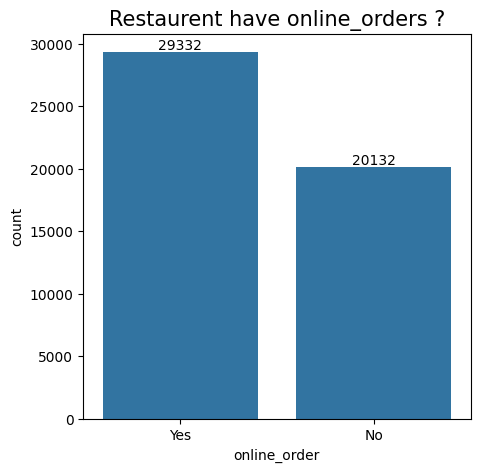

In [52]:
# Creating a countplot to know about online_order is available or not
plt.figure(figsize= (5,5))
ax = sns.countplot(data = data, x= 'online_order')
plt.title('Restaurent have online_orders ?', size = 15)
ax.bar_label(ax.containers[0])
plt.show()

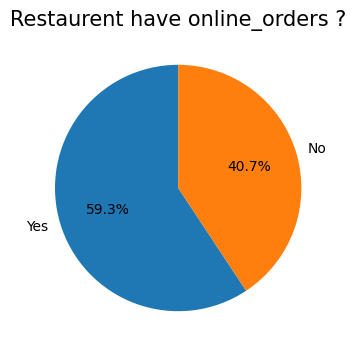

In [53]:

# Creating pie chart for percentage
plt.figure(figsize= (4,4))
labels = ['Yes', 'No']
x = data['online_order'].value_counts().values
plt.pie(x, labels = labels, autopct = '%1.1f%%', startangle= 90)
plt.title('Restaurent have online_orders ?', size = 15)
plt.show()

Conclusion: 59.3% Restaurents in Bengaluru has delivering online_orders

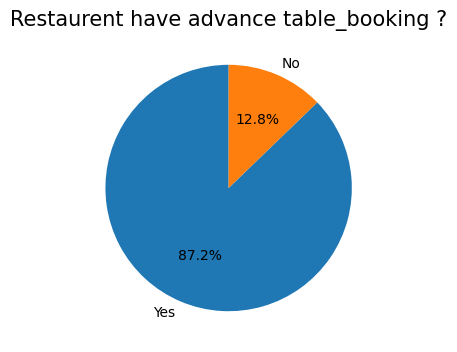

In [54]:
# Check whether table_bookings are available or not 
# Creating pie chart for book_table
plt.figure(figsize= (4,4))
labels = ['Yes', 'No']
x = data['book_table'].value_counts().values
plt.pie(x, labels = labels, autopct = '%1.1f%%', startangle= 90)
plt.title('Restaurent have advance table_booking ?', size = 15)
plt.show()

Conclusion: 87.2% Restaurent have providing advance table_booking fecility

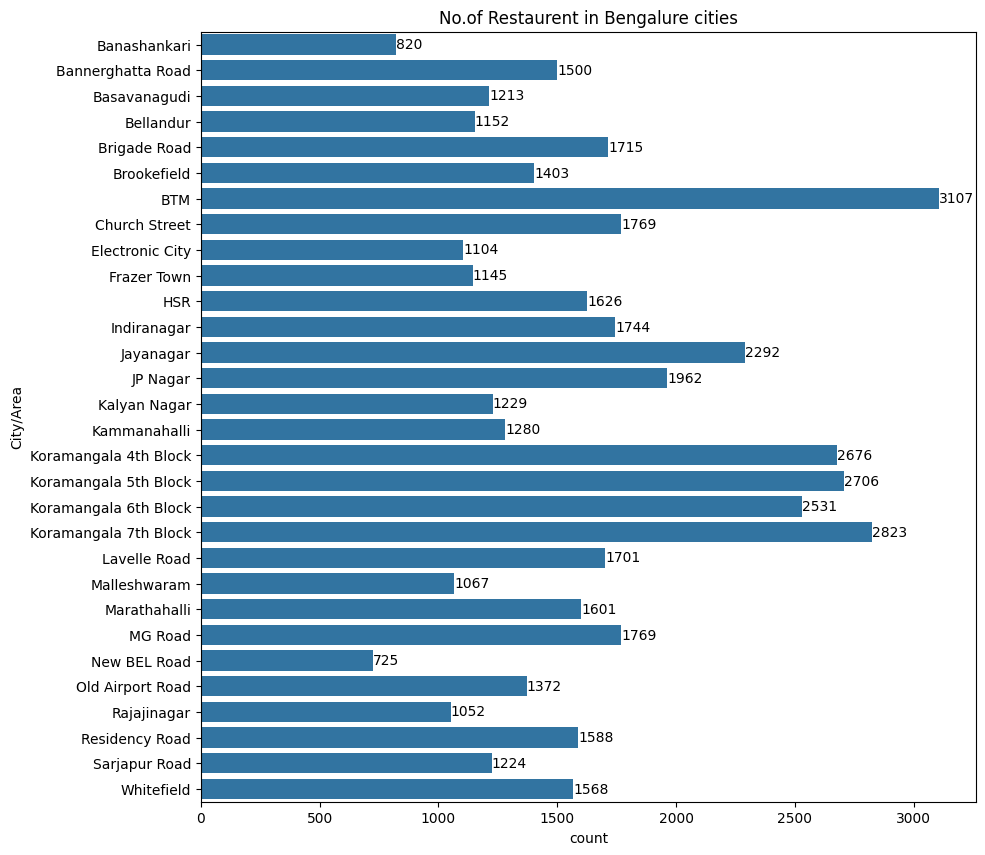

In [55]:
# How many restaurants in a particular City / Area
# No.of Restaurent in Bengalure cities
plt.figure(figsize= (10,10))
ax = sns.countplot(data= data, y='listed_in(city)')
plt.title('No.of Restaurent in Bengalure cities')
plt.ylabel('City/Area')
ax.bar_label(ax.containers[0])
plt.show()

Conclusion: Every city in Bengaluru have more than 500 Restaurants, It means Food business in Bengaluru is booming 

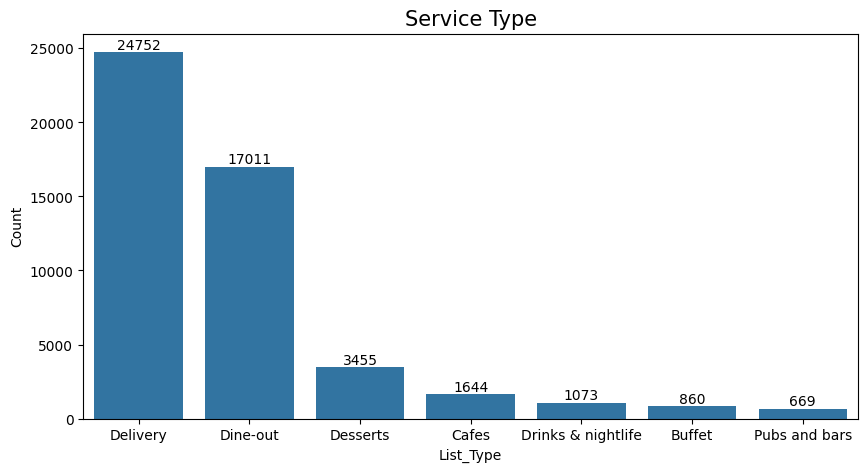

In [56]:
# Service_Type_count
count_list_type = data['listed_in(type)'].value_counts().reset_index()
count_list_type.columns = ['List_Type','Count']
 
plt.figure(figsize= (10,5))
ax = sns.barplot(x= 'List_Type', y= 'Count', data = count_list_type)
plt.title('Service Type', size = 15)

ax.bar_label(ax.containers[0])
plt.show()

Conclusion: Restaurants in Bengaluru offer delivery services most frequently, followed by dine-out services, compared to other service types.

In [57]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'rest_type_1', 'rest_type_2', 'cuisines_1', 'cuisines_2',
       'cuisines_3', 'cuisines_4', 'cuisines_7'],
      dtype='object')

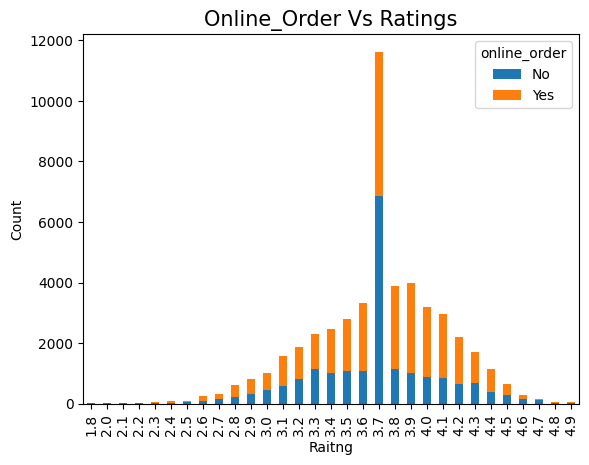

In [58]:
# Online_Order Vs Rating
x_plot = pd.crosstab(data['New_Rating'], data['online_order'])
x_plot.plot(kind = 'bar', stacked = True)
plt.title('Online_Order Vs Ratings', size= 15)
plt.xlabel('Raitng')
plt.ylabel('Count')
plt.show()

Conclusion: Restaurants that offer online ordering have higher ratings compared to those that do not.

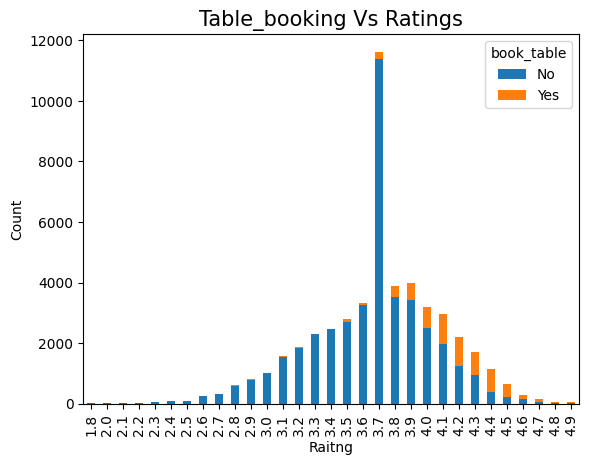

In [59]:
# Table_booking Vs Rating
x_plot = pd.crosstab(data['New_Rating'], data['book_table'])
x_plot.plot(kind = 'bar', stacked = True)
plt.title('Table_booking Vs Ratings', size= 15)
plt.xlabel('Raitng')
plt.ylabel('Count')
plt.show()

Conclusion: Restaurants that not offer table booking have higher ratings compared to those that do.    

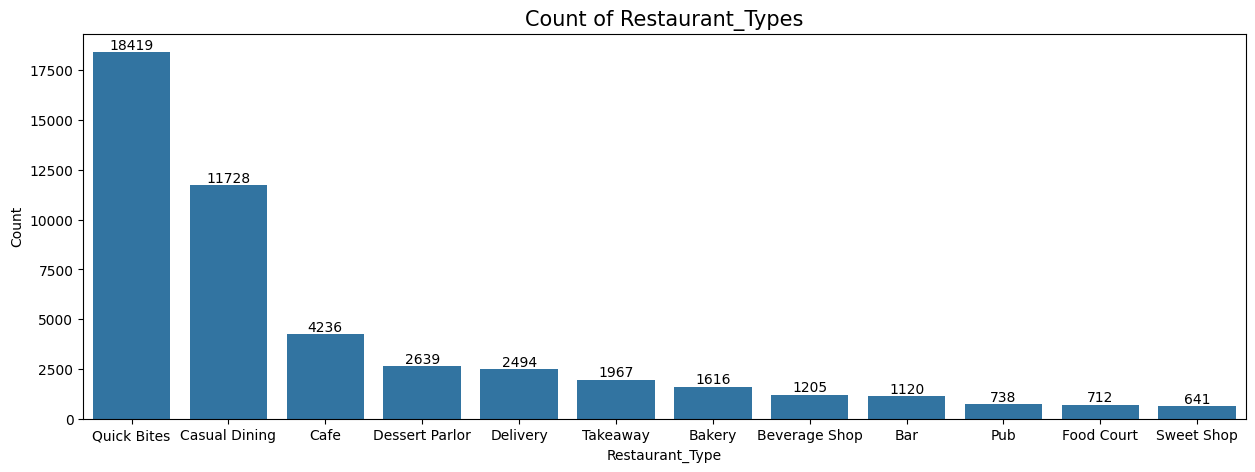

In [60]:
# Count of restaurant_types
count_rest_type = data['rest_type_1'].value_counts().reset_index()
count_rest_type.columns = ['Restaurant_Type','Count']

plt.figure(figsize = (15,5))
ax = sns.barplot(x= 'Restaurant_Type', y= 'Count', data = count_rest_type.head(12))
plt.title('Count of Restaurant_Types', size = 15)

ax.bar_label(ax.containers[0])
plt.show()


Conclusion: In Bengaluru, Quick Bites are the most common restaurants, followed by Casual Dining, while Food Courts and Sweet Shops are much rarer.

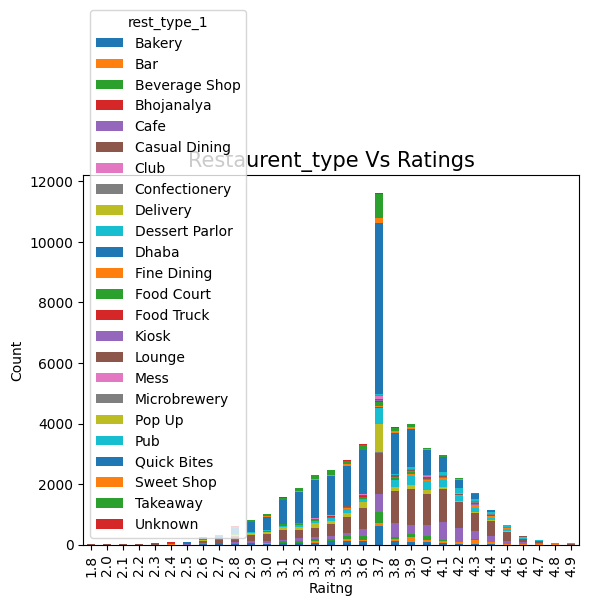

In [61]:
# Restaurent_type Vs Rating
x_plot = pd.crosstab(data['New_Rating'], data['rest_type_1'])
x_plot.plot(kind = 'bar', stacked = True)
plt.title('Restaurent_type Vs Ratings', size= 15)
plt.xlabel('Raitng')
plt.ylabel('Count')
plt.show()

Conclusion: Quick Bites have good rating comparing to others

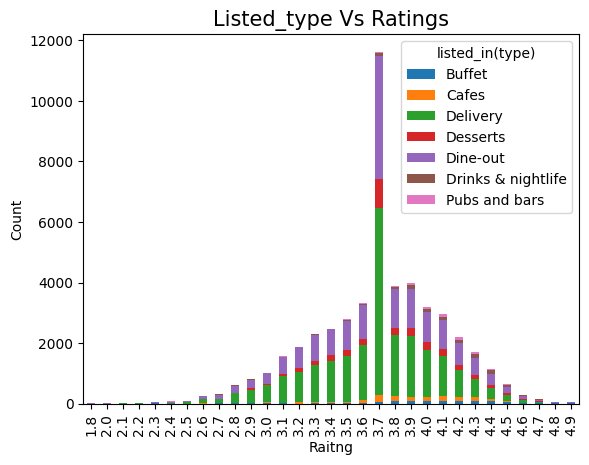

In [62]:
# Listed_type Vs Rating
x_plot = pd.crosstab(data['New_Rating'], data['listed_in(type)'])
x_plot.plot(kind = 'bar', stacked = True)
plt.title('Listed_type Vs Ratings', size= 15)
plt.xlabel('Raitng')
plt.ylabel('Count')
plt.show()

Conclusion: Restaurants in Bengaluru that offer delivery and dine-out services have higher ratings than those offering other services.

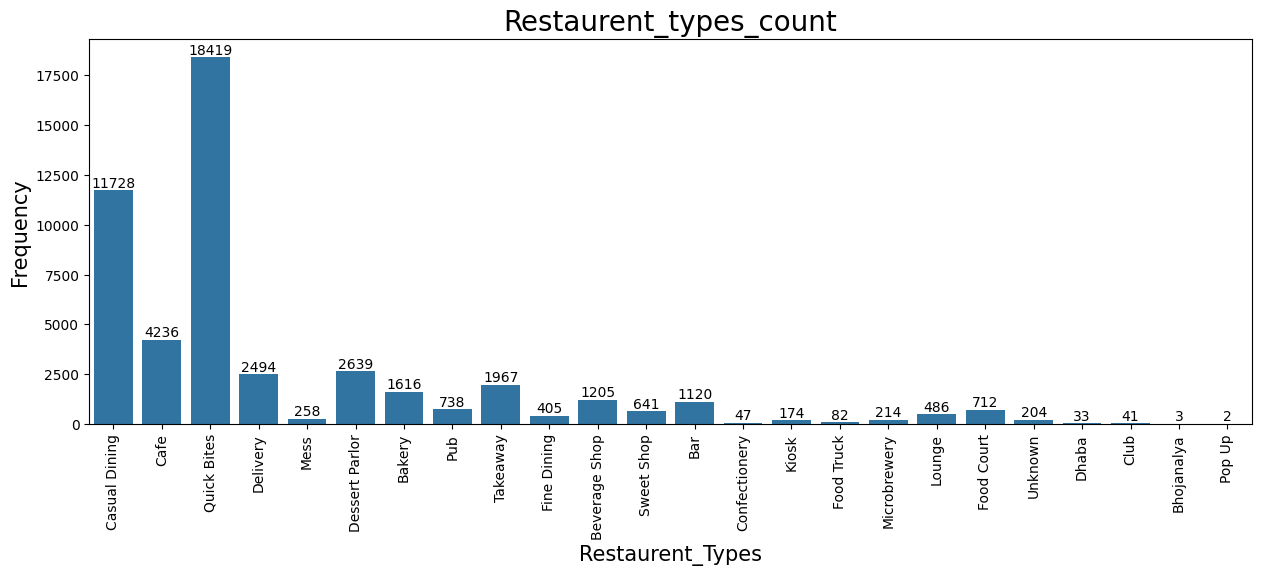

In [63]:
# Restaurent_Types_count

plt.figure(figsize= (15,5))
ax = sns.countplot(data= data, x='rest_type_1')
plt.xticks( rotation = 90)
plt.title('Restaurent_types_count', size= 20)
plt.xlabel('Restaurent_Types', size= 15)
plt.ylabel('Frequency', size= 15)
ax.bar_label(ax.containers[0])
plt.show()

Conclusion: Quick Bites are by far the most common restaurant type in Bengaluru, with Casual Dining and Cafes coming next.
            At the other end, niche formats like Pop Up, Food Court, and Club appear very rarely.


In [64]:
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'New_Rating', 'rest_type_1', 'rest_type_2', 'cuisines_1', 'cuisines_2',
       'cuisines_3', 'cuisines_4', 'cuisines_7'],
      dtype='object')

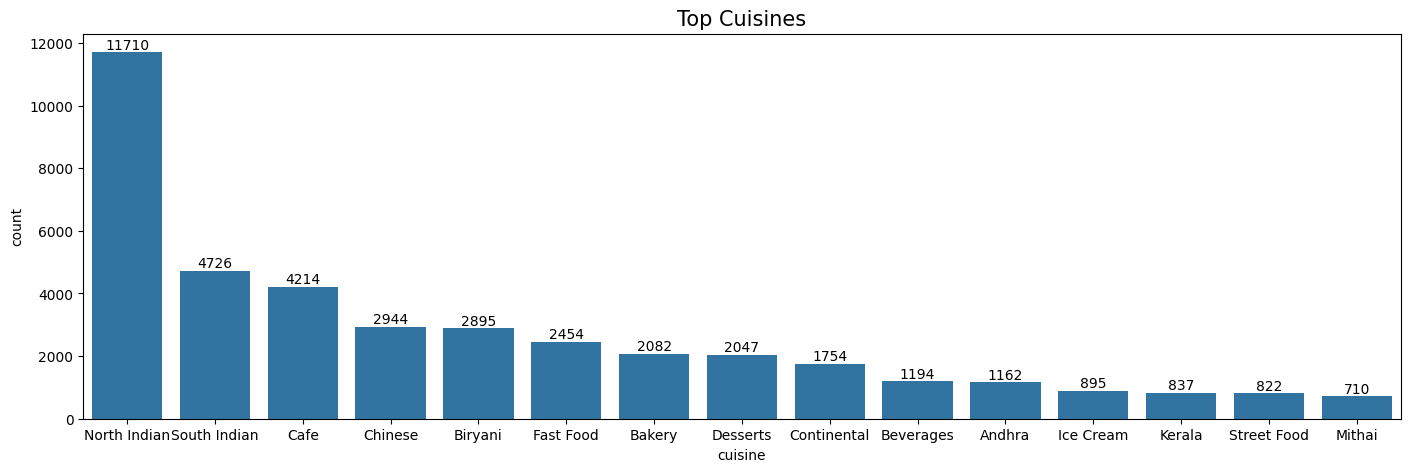

In [65]:
# Which are Famous Cuisines in Bengaluru
df = data['cuisines_1'].value_counts().reset_index()
df.columns = ['cuisine', 'count']

plt.figure(figsize= (17,5))
ax = sns.barplot(x='cuisine', y='count', data=df.head(15))
plt.title("Top Cuisines", size= 15)
ax.bar_label(ax.containers[0])
plt.show()

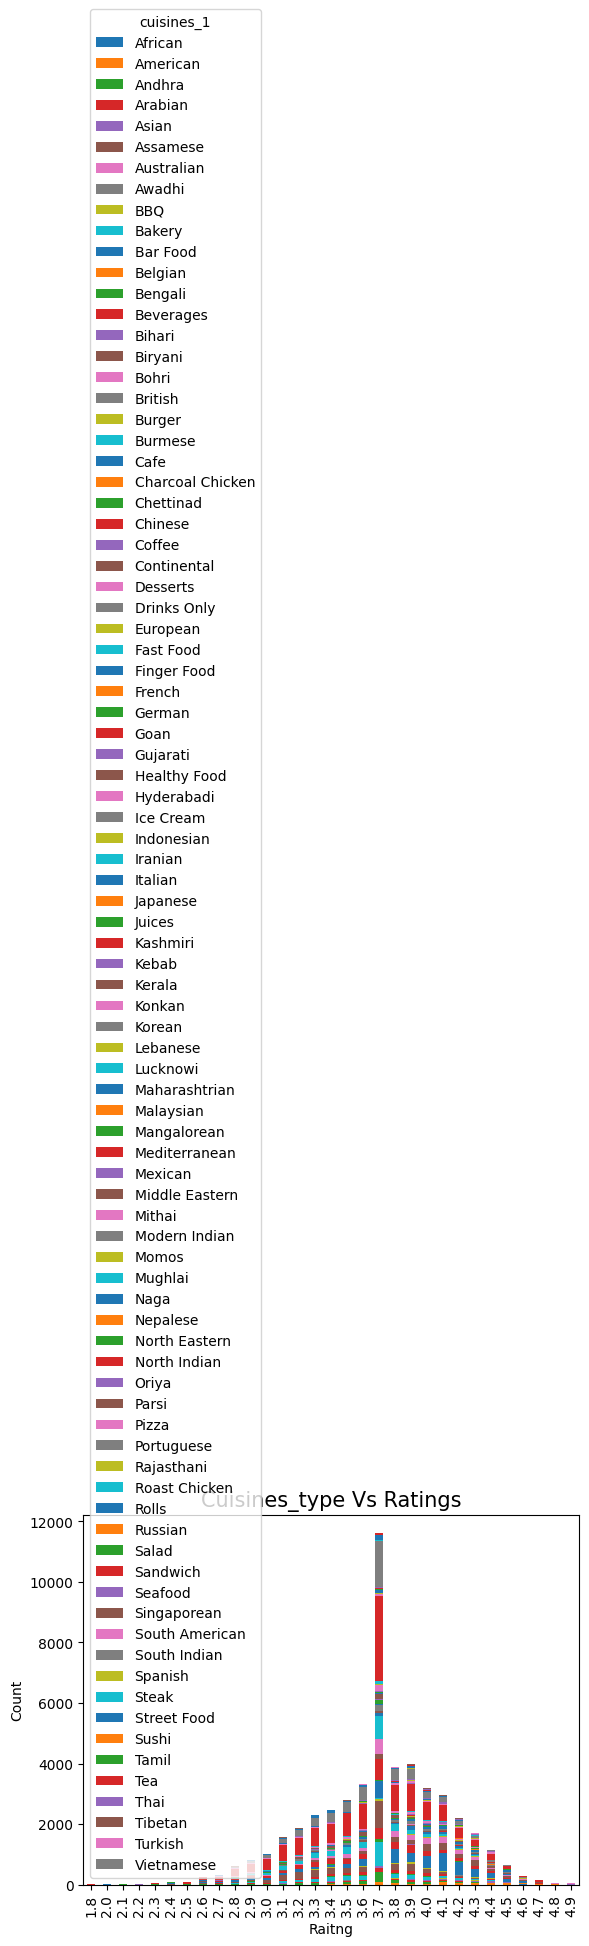

In [66]:
# Cuisines_type Vs Rating
x_plot = pd.crosstab(data['New_Rating'], data['cuisines_1'])
x_plot.plot(kind = 'bar', stacked = True)
plt.title('Cuisines_type Vs Ratings', size= 15)
plt.xlabel('Raitng')
plt.ylabel('Count')
plt.show()

Conclusion:  North Indian cuisine is by far the most common in Bengaluru restaurants.
South Indian and Cafe cuisines come next, with other cuisines much less frequent.


In [67]:
# Avg/ Common approx_cost(for two people)
Avg = data['approx_cost(for two people)'].mean()
Mode = data['approx_cost(for two people)'].mode()

print(f"Avgerage amount for two people:{Avg:,.1f}")
print(f"Common amount for two people:{Mode}")


Avgerage amount for two people:559.9
Common amount for two people:0    300.0
Name: approx_cost(for two people), dtype: float64


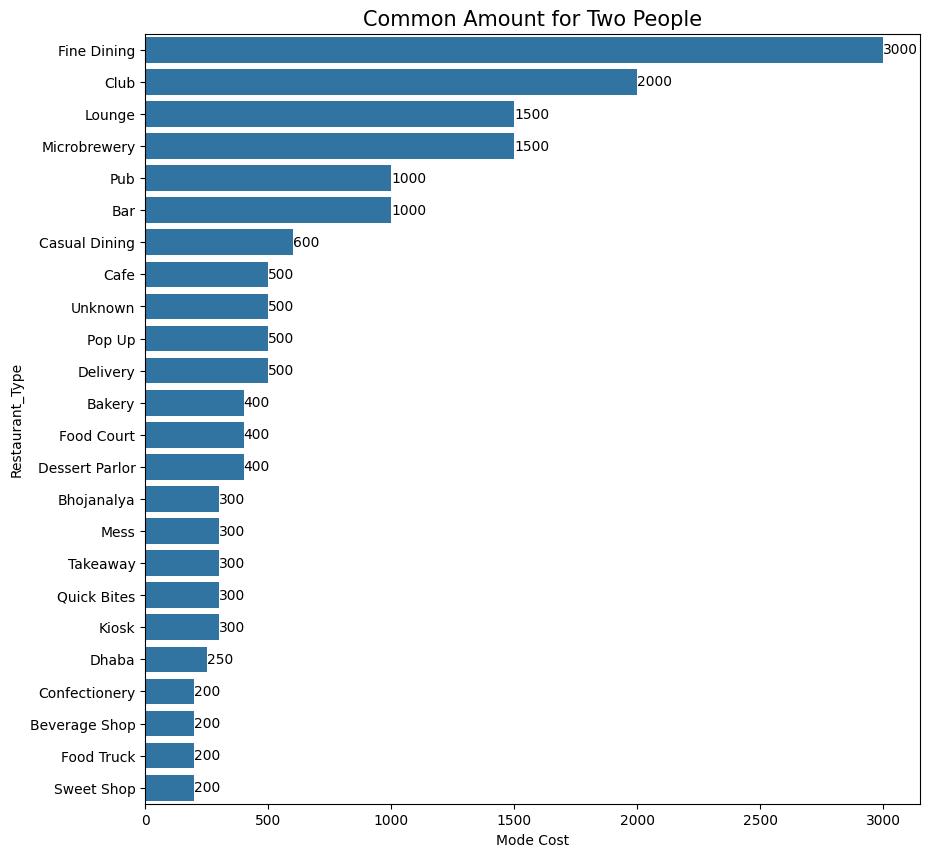

In [68]:
# How much amount would cost for two people in particular Restaurant_Type

Amount = data.groupby('rest_type_1',as_index=False)['approx_cost(for two people)'].agg(pd.Series.mode).sort_values(by='approx_cost(for two people)',ascending= False)
Amount.columns = ['Restaurant_Type','Cost']

plt.figure(figsize= (10,10))
ax = sns.barplot(x= 'Cost', y= 'Restaurant_Type', data= Amount)
plt.title('Common Amount for Two People', size= 15)
plt.xlabel('Mode Cost')
ax.bar_label(ax.containers[0])
plt.show()


#### 1.Bengaluru’s restaurant industry is thriving, with every city hosting over 500 establishments, showing strong demand for food services.


#### 2.Quick Bites and North Indian cuisine dominate the dining landscape, reflecting consumer preference for fast and familiar meals.


#### 3.A majority of restaurants offer delivery, dine-out, and online ordering, making convenience a key driver of success.


#### 4.Interestingly, restaurants that don't offer table booking tend to have slightly higher ratings than those that do.


#### 5.Overall, restaurants combining multiple services and popular formats consistently achieve higher customer satisfaction.
